# Homework

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import urllib.request
import os
from pathlib import Path

def getting_the_data(current_script_dir:str) -> str:
    """Downloading the required data CSV file if not already downloaded.
    Returns:
        str: The local file path
    """
    url_data = "https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv"
    output_path = os.path.join(current_script_dir, Path(url_data).name)
    # only download if neccessary
    if not os.path.exists(output_path):
        urllib.request.urlretrieve(
            url_data,
            output_path
        )
    return output_path

### EDA
- Load the data.
- Look at the median_house_value variable. Does it have a long tail?

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


None

/usr/local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='median_house_value', ylabel='Count'>

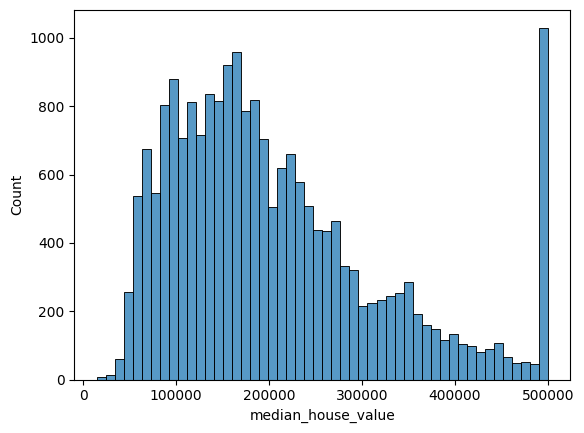

In [2]:
# loading the data if not already downloaded
notebook_dir = globals()['_dh'][0]
file_path = getting_the_data(notebook_dir)
df = pd.read_csv(file_path)
display(df.head(2))
display(df.info())

sns.histplot(df.median_house_value, bins=50)

### Preparing the dataset 

For this homework, we only want to use a subset of data. 

First, keep only the records where `ocean_proximity` is either `'<1H OCEAN'` or `'INLAND'`

In [3]:
indices_to_drop = ~df['ocean_proximity'].isin(['<1H OCEAN', 'INLAND'])
df.drop(index=df.index[indices_to_drop], inplace=True)



Next, use only the following columns:

In [4]:
columns_to_keep = [
    'latitude',
    'longitude',
    'housing_median_age',
    'total_rooms',
    'total_bedrooms',
    'population',
    'households',
    'median_income',
    'median_house_value']
df = df[columns_to_keep]
df.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
701,37.64,-121.97,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0
830,37.61,-121.99,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0
859,37.57,-121.97,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0
860,37.58,-121.96,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0
861,37.58,-121.98,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0


### Question 1

There's one feature with missing values. What is it?

* `total_rooms`
* __`total_bedrooms`__
* `population`
* `households`

In [5]:
df.columns[df.isnull().any()].values.tolist()

['total_bedrooms']

### Question 2

What's the median (50% percentile) for variable `'population'`?

- 995
- 1095
- __1195__
- 1295

In [6]:
# both can be methods can be used
df.population.median(), df.population.quantile(0.5)

(1195.0, 1195.0)

/usr/local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='median_house_value', ylabel='Count'>

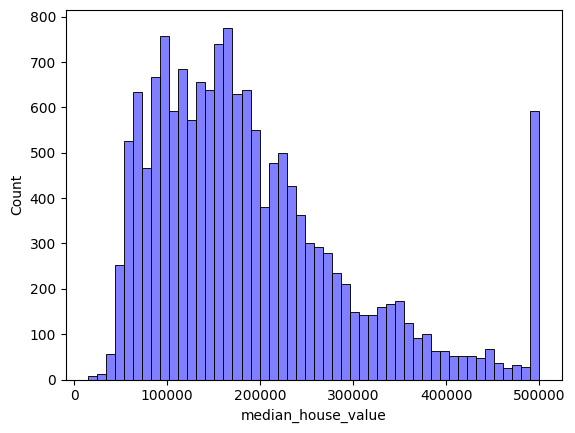

In [7]:
sns.histplot(df.median_house_value, alpha=.5, bins=50, color='blue')

/usr/local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='median_house_value', ylabel='Count'>

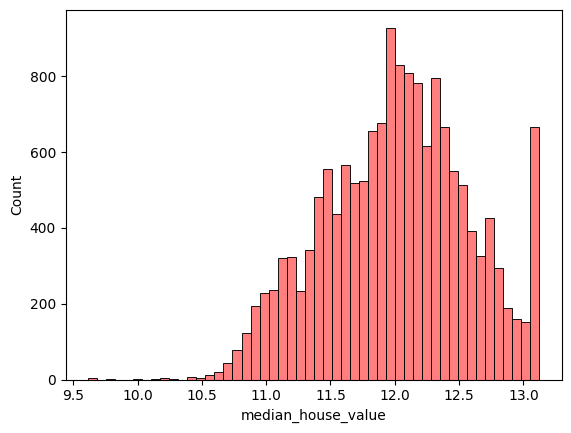

In [8]:
sns.histplot(df.median_house_value.apply(np.log1p), alpha=.5, bins=50, color='red')

### Prepare and split the dataset

* Shuffle the initial dataset, use seed `42`.
* Split your data in train/val/test sets, with 60%/20%/20% distribution.
* Apply the log transformation to the `median_house_value` variable using the `np.log1p()` function.

In [9]:
def prepare_split_train_val_test(df, seed, verbose=False):
    df_shuffled = df.copy(deep=True).sample(frac=1,random_state=seed)
    if verbose:
        display(df_shuffled.head(2))
    df_shuffled.median_house_value = df_shuffled.median_house_value.apply(np.log1p)
    if verbose:
        display(df_shuffled.head(2))
    df_shuffled = df_shuffled.reset_index(drop=True)
    if verbose:
        display(df_shuffled.head(2)) 
        display(df_shuffled.describe())

    n_total = len(df_shuffled)
    n_val = int(n_total * 0.2)
    n_test = int(n_total * 0.2)
    n_train = n_total - n_val - n_test

    df_train = df_shuffled[:n_train]
    df_val = df_shuffled[n_train:n_train+n_val]
    df_test = df_shuffled[n_train+n_val:]

    return df_train, df_val, df_test

df_train, df_val, df_test = prepare_split_train_val_test(df, seed=42, verbose=True)

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
19963,36.23,-119.14,22.0,2935.0,523.0,1927.0,530.0,2.5875,70400.0
5929,34.12,-117.79,16.0,2426.0,426.0,1319.0,446.0,4.8125,224500.0


,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
19963,36.23,-119.14,22.0,2935.0,523.0,1927.0,530.0,2.5875,11.161963
5929,34.12,-117.79,16.0,2426.0,426.0,1319.0,446.0,4.8125,12.321635


,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,36.23,-119.14,22.0,2935.0,523.0,1927.0,530.0,2.5875,11.161963
1,34.12,-117.79,16.0,2426.0,426.0,1319.0,446.0,4.8125,12.321635


,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,15687.000000,15687.000000,15687.000000,15687.000000,15530.000000,15687.000000,15687.000000,15687.000000,15687.000000
mean,35.467307,-119.217442,27.188118,2665.677312,541.244688,1466.317205,500.916491,3.804019,12.010342
std,2.066387,1.780380,12.057128,2257.672743,435.650018,1180.389908,392.759399,1.857158,0.564962
min,32.610000,-124.140000,1.000000,2.000000,2.000000,3.000000,2.000000,0.499900,9.615805
25%,33.940000,-121.070000,17.000000,1441.000000,295.000000,802.000000,278.000000,2.520800,11.619994
50%,34.160000,-118.370000,27.000000,2118.000000,432.000000,1195.000000,406.000000,3.468800,12.025156
75%,37.340000,-117.990000,36.000000,3172.000000,645.000000,1777.000000,602.000000,4.686200,12.392971
max,41.950000,-114.310000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,13.122367


In [10]:
len(df_train), len(df_val), len(df_test)

(9413, 3137, 3137)

In [11]:
len(df_train) + len(df_val) + len(df_test) == len(df)

True

In [12]:
df_train.head(2)

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,36.23,-119.14,22.0,2935.0,523.0,1927.0,530.0,2.5875,11.161963
1,34.12,-117.79,16.0,2426.0,426.0,1319.0,446.0,4.8125,12.321635


### Question 3

* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using `round(score, 2)`
* Which option gives better RMSE?

Options:

- With 0
- With mean
- __Both are equally good__

In [13]:
# Code from https://github.com/alexeygrigorev/mlbookcamp-code/blob/master/chapter-02-car-price/02-carprice.ipynb or at lease inspired by it.
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    return w[0], w[1:]

def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    return w[0], w[1:]

def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

def predict(x, w_0, w):
    y_pred = x.dot(w) + w_0
    return y_pred

def prepare_X(df, col_name_drop, col_name_fillna, fillna_value):
    df_x = df.drop(col_name_drop, axis=1)
    df_x[col_name_fillna] = df_x[col_name_fillna].fillna(fillna_value)
    return df_x.values

def prepare_y(df, y_data_col_name):
    df_y = df[y_data_col_name]
    return df_y.values

In [14]:
df.total_bedrooms.isna().any()

True

In [15]:
col_name_fillna = 'total_bedrooms'
col_name_y = 'median_house_value'
col_name_fillna_mean = df_train[col_name_fillna].mean()

In [16]:
x_train_zero = prepare_X(df_train, col_name_drop=col_name_y, col_name_fillna=col_name_fillna, fillna_value=0)
x_train_mean = prepare_X(df_train, col_name_drop=col_name_y, col_name_fillna=col_name_fillna, fillna_value=col_name_fillna_mean)

x_val_zero = prepare_X(df_val, col_name_drop=col_name_y, col_name_fillna=col_name_fillna, fillna_value=0)
x_val_mean = prepare_X(df_val, col_name_drop=col_name_y, col_name_fillna=col_name_fillna, fillna_value=col_name_fillna_mean)

y_train = prepare_y(df_train, y_data_col_name=col_name_y)
y_val = prepare_y(df_val, y_data_col_name=col_name_y)

In [17]:
# column from Q1 is total_bedrooms
w_0_zero, w_zero = train_linear_regression(x_train_zero, y_train)
y_pred_zero_val = predict(x_val_zero, w_0_zero, w_zero)

w_0_mean, w_mean = train_linear_regression(x_train_mean, y_train)
y_pred_mean_val = predict(x_val_mean, w_0_mean, w_mean)

rmse_zero = rmse(y_val, y_pred_zero_val)
rmse_mean = rmse(y_val, y_pred_mean_val)
print(f"RMSE_zero: {rmse_zero:.2f}")
print(f"RMSE_mean: {rmse_mean:.2f}")

RMSE_zero: 0.34
RMSE_mean: 0.34


In [18]:
# print(f"RMSE_zero: {rmse_zero:.5f}")
# print(f"RMSE_mean: {rmse_mean:.5f}")

In [19]:
print(w_0_zero, w_zero)
print(w_0_mean, w_mean)

-9.76324947791179 [-2.68233309e-01 -2.55938802e-01  1.77710730e-03 -3.38393956e-05
  2.93766352e-04 -1.52190447e-04  3.96908643e-04  1.80600946e-01]
-9.886133216298681 [-2.68652914e-01 -2.57026361e-01  1.79880767e-03 -3.87631029e-05
  3.78806885e-04 -1.49641599e-04  3.25344392e-04  1.81951358e-01]


/usr/local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_conte

<Axes: ylabel='Count'>

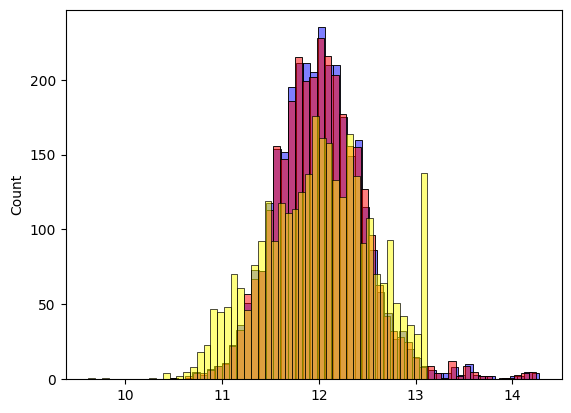

In [20]:
sns.histplot(y_pred_mean_val, alpha=.5, bins=50, color='blue')
sns.histplot(y_pred_zero_val, alpha=.5, bins=50, color='red')
sns.histplot(y_val, alpha=.5, bins=50, color='yellow')

Trying the same as above using scikit-learn.

In [21]:
# column from Q1 is total_bedrooms
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
reg = linear_model.LinearRegression()

model_zero = reg.fit(x_train_zero, y_train)
y_predict_zero_val = model_zero.predict(x_val_zero)
rmse_zero = np.sqrt(mean_squared_error(y_val, y_predict_zero_val))

model_mean = reg.fit(x_train_mean, y_train)
y_predict_mean_val = model_mean.predict(x_val_zero)
rmse_mean = np.sqrt(mean_squared_error(y_val, y_predict_mean_val))

print(f"RMSE_zero: {rmse_zero:.2f}")
print(f"RMSE_mean: {rmse_mean:.2f}")


RMSE_zero: 0.34
RMSE_mean: 0.34


### Question 4

* Now let's train a regularized linear regression.
* For this question, fill the NAs with 0. 
* Try different values of `r` from this list: `[0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]`.
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.
* Which `r` gives the best RMSE?

If there are multiple options, select the smallest `r`.

Options:

- __0__
- 0.000001
- 0.001
- 0.0001


In [22]:
reg_values = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]

In [23]:
result = {}
for reg_value in reg_values:
    w_0_zero, w_zero = train_linear_regression_reg(
        x_train_zero, y_train,reg_value
    )
    y_pred_zero_val = predict(x_val_zero, w_0_zero, w_zero)
    rmse_zero = rmse(y_val, y_pred_zero_val)

    result[reg_value] = np.round(rmse_zero, decimals=2)
    #print(f"RMSE: {rmse_zero:.2f}, Regularization: {reg_value}")

result_sorted = dict(sorted(result.items(), key=lambda item: item[1]))
for v_reg, v_rmse in result_sorted.items():
    print(f"RMSE: {v_rmse}, Regularization: {v_reg}")


RMSE: 0.34, Regularization: 0
RMSE: 0.34, Regularization: 1e-06
RMSE: 0.34, Regularization: 0.0001
RMSE: 0.34, Regularization: 0.001
RMSE: 0.34, Regularization: 0.01
RMSE: 0.34, Regularization: 0.1
RMSE: 0.34, Regularization: 1
RMSE: 0.35, Regularization: 5
RMSE: 0.35, Regularization: 10


Trying out Ridge

In [24]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

result = {}
for reg_value in reg_values:
    reg_model = Ridge(alpha=reg_value)
    model_zero = reg_model.fit(x_train_zero, y_train)
    y_pred_val_zero = model_zero.predict(x_val_zero)
    rmse_zero = np.sqrt(mean_squared_error(y_val, y_pred_val_zero))
    result[reg_value] = np.round(rmse_zero, decimals=2)

result_sorted = dict(sorted(result.items(), key=lambda item: item[1]))
for v_reg, v_rmse in result_sorted.items():
    print(f"RMSE: {v_rmse}, Regularization: {v_reg}")

RMSE: 0.34, Regularization: 0
RMSE: 0.34, Regularization: 1e-06
RMSE: 0.34, Regularization: 0.0001
RMSE: 0.34, Regularization: 0.001
RMSE: 0.34, Regularization: 0.01
RMSE: 0.34, Regularization: 0.1
RMSE: 0.34, Regularization: 1
RMSE: 0.34, Regularization: 5
RMSE: 0.34, Regularization: 10


### Question 5 

* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: `[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]`.
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores. 
* What's the standard deviation of all the scores? To compute the standard deviation, use `np.std`.
* Round the result to 3 decimal digits (`round(std, 3)`)

> Note: Standard deviation shows how different the values are.
> If it's low, then all values are approximately the same.
> If it's high, the values are different. 
> If standard deviation of scores is low, then our model is *stable*.

What's the value of std?

- 0.5
- 0.05
- __0.005__
- 0.0005

In [25]:
# display(df_train.describe())
# display(df_val.describe())
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9413 entries, 0 to 9412
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   latitude            9413 non-null   float64
 1   longitude           9413 non-null   float64
 2   housing_median_age  9413 non-null   float64
 3   total_rooms         9413 non-null   float64
 4   total_bedrooms      9319 non-null   float64
 5   population          9413 non-null   float64
 6   households          9413 non-null   float64
 7   median_income       9413 non-null   float64
 8   median_house_value  9413 non-null   float64
dtypes: float64(9)
memory usage: 662.0 KB


In [26]:
seed_values = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
result = {}
for seed in seed_values:
    df_train, df_val, df_test = prepare_split_train_val_test(df, seed)  
    #display(df_train.head())

    x_train = prepare_X(df_train, col_name_drop=col_name_y, col_name_fillna=col_name_fillna, fillna_value=0)
    x_val = prepare_X(df_val, col_name_drop=col_name_y, col_name_fillna=col_name_fillna, fillna_value=0)
    y_train_zero = prepare_y(df_train, y_data_col_name=col_name_y)
    y_val_zero = prepare_y(df_val, y_data_col_name=col_name_y)

    w_0_zero, w_zero = train_linear_regression(x_train,y_train_zero)
    y_pred_zero_val = predict(x_val, w_0_zero, w_zero)

    #print(w_0_zero, w_zero[0])

    rmse_zero = rmse(y_val_zero, y_pred_zero_val)
    print(f"RMSE: {rmse_zero:.3f}, seed: {seed}")

    result[seed] = np.round(rmse_zero, decimals=3)

RMSE: 0.338, seed: 0
RMSE: 0.338, seed: 1
RMSE: 0.338, seed: 2
RMSE: 0.332, seed: 3
RMSE: 0.339, seed: 4
RMSE: 0.343, seed: 5
RMSE: 0.339, seed: 6
RMSE: 0.347, seed: 7
RMSE: 0.351, seed: 8
RMSE: 0.334, seed: 9


In [27]:
print(f"std RMSE: {np.std(list(result.values())):.3f}")

std RMSE: 0.005


### Question 6

* Split the dataset like previously, use seed 9.
* Combine train and validation datasets.
* Fill the missing values with 0 and train a model with `r=0.001`. 
* What's the RMSE on the test dataset?

Options:

- 0.13
- 0.23
- __0.33__
- 0.43


In [28]:
df_train, df_val, df_test = prepare_split_train_val_test(df, seed=9)  
df_train_val = pd.concat([df_train, df_val]).reset_index(drop=True)

x_train_val = prepare_X(df_train_val, col_name_drop=col_name_y, col_name_fillna=col_name_fillna, fillna_value=0)
x_test = prepare_X(df_test, col_name_drop=col_name_y, col_name_fillna=col_name_fillna, fillna_value=0)
y_train_val = prepare_y(df_train_val, y_data_col_name=col_name_y)
y_test = prepare_y(df_test, y_data_col_name=col_name_y)

w_0_zero, w_zero = train_linear_regression_reg(x_train_val, y_train_val, r=0.001)
y_pred_test = predict(x_test, w_0_zero, w_zero)

#print(w_0_zero, w_zero[0])

rmse_zero = rmse(y_test, y_pred_test)
print(f"RMSE: {rmse_zero:.2f}, seed: {seed}")

RMSE: 0.33, seed: 9


Same as above but using sckit-learn.

In [29]:
# column from Q1 is total_bedrooms
from sklearn.linear_model import Ridge 
from sklearn.metrics import mean_squared_error

reg_model = Ridge(alpha=0.001)

model_zero = reg_model.fit(x_train_val, y_train_val)
y_predict_train_val = model_zero.predict(x_test)
rmse_zero = np.sqrt(mean_squared_error(y_test, y_predict_train_val))

print(f"RMSE_zero: {rmse_zero:.2f}")


RMSE_zero: 0.33
